# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup Object
html = browser.html 
soup = BeautifulSoup(html, "html.parser")

In [12]:
# Extract all rows of data
table = soup.find("table", class_="table")
rows = table.find_all("tr")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [15]:
# Create an empty list
weather_data = []

# Loop through the scraped data to create a list of rows
for row in rows[1:]:
    cols = row.find_all("td")
    row_data = [col.text.strip() for col in cols]
    weather_data.append(row_data)


In [17]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]

df = pd.DataFrame(weather_data, columns=column_names)

In [37]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [45]:
# Examine data type of each column
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [47]:
# Change data types for data analysis
df["id"] = df["id"].astype(str)
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])
df["sol"] = df["sol"].astype(int)
df["ls"] = df["ls"].astype(int)
df["month"] = df["month"].astype(int)
df["min_temp"] = df["min_temp"].astype(float)
df["pressure"] = df["pressure"].astype(float)

In [49]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [56]:
# 1. How many months are there on Mars?
num_months = df["month"].nunique()
print(num_months)

12


In [70]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = df["sol"].nunique()
print(num_sols)

1867


In [74]:
# 3. What is the average minimum temperature by month?
avg_temp_by_month = df.groupby("month")["min_temp"].mean()
avg_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0.5, 1.0, 'Average Minimum Temperature by Month')

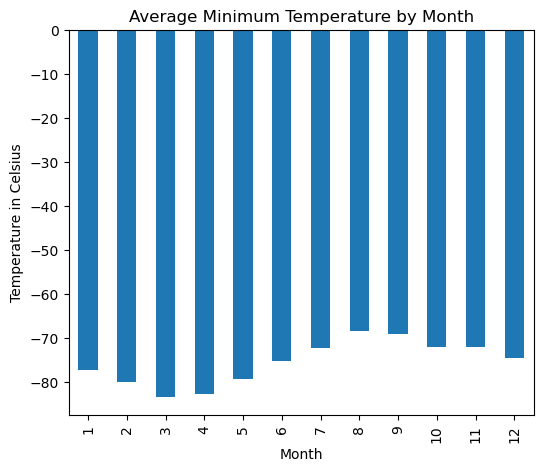

In [80]:
# Plot the average minimum temperature by month
plt.figure(figsize=(6,5))
avg_temp_by_month.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Temperature in Celsius")
plt.title("Average Minimum Temperature by Month")

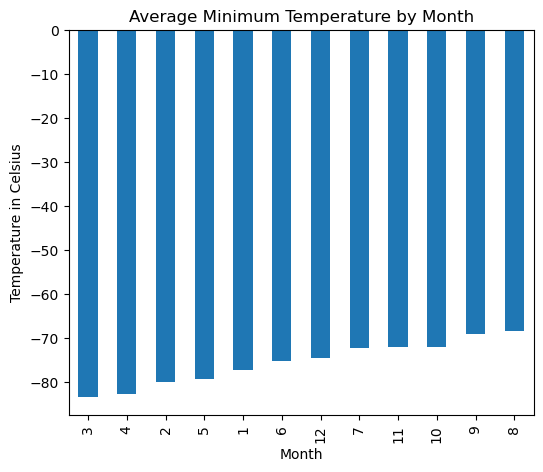

In [82]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_temp = avg_temp_by_month.sort_values()
sorted_avg_temp

plt.figure(figsize=(6,5))
sorted_avg_temp.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Temperature in Celsius")
plt.title("Average Minimum Temperature by Month")
plt.show()

In [86]:
# 4. What is the average pressure by month?
avg_pressure_by_month = df.groupby("month")["pressure"].mean()
avg_pressure_by_month = avg_pressure_by_month.sort_index()
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

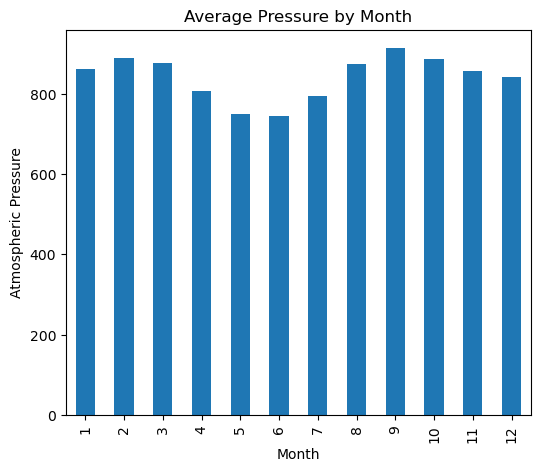

In [90]:
# Plot the average pressure by month
plt.figure(figsize=(6,5))
avg_pressure_by_month.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")
plt.title("Average Pressure by Month")
plt.show()

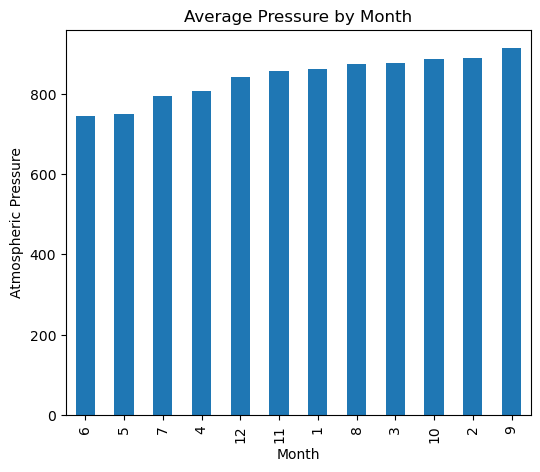

In [94]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure = avg_pressure_by_month.sort_values()
sorted_avg_pressure

plt.figure(figsize=(6,5))
sorted_avg_pressure.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")
plt.title("Average Pressure by Month")
plt.show()

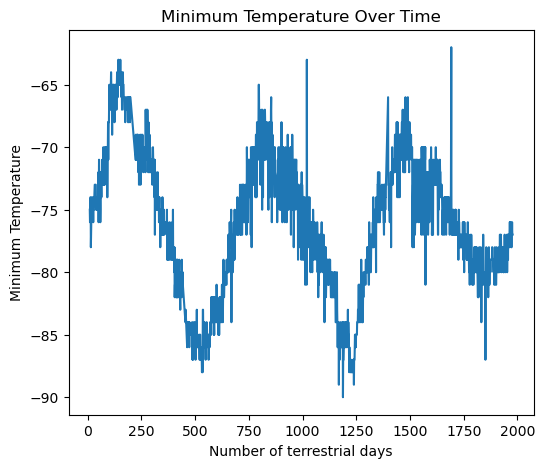

In [104]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(6,5))
plt.plot(df["sol"], df["min_temp"], linestyle="-")
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum Temperature")
plt.title("Minimum Temperature Over Time")
plt.show()

#### Minimum Temperature

Based on the data, the coldest month on Mars is Month 3 at -83.3 celsius. With the warmest Month being 8 at -64.4 celsius. A seasonal pattern is present, showing colder months at the beginning of the year gradually warming up as the months pass. Mars most likely has a tilt that causes the seasons, similar to Earth's. 

#### Atmospheric Pressure

The lowest atmospheric pressure was at Month 6 at about 745 Pa. The highest atmospheric pressure was at Month 9 at about 913 Pa. This suggests that atmospheric pressure on Mars fluctuates a lot throughout the year. This could be due to changes in CO2 levels which would affect the density of Mars as it moves through orbit.

#### Year Length

Since we visually laid out minimum temperature fluctuations over time, we can estimate the length of a Martian year. The temperature cycle repeats about every 600 Earth days. This is significantly longer than Earth's 365-day year, so in turn, the seasons are longer and temperature can vary more. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [106]:
# Write the data to a CSV
df.to_csv("../data/mars_weather.csv", index=False)

In [108]:
browser.quit()